## 災害データ分析とストーリーテリング

**はじめに**

この Notebook では、国際的な災害データベースである EM-DAT を用いて、
日本で発生した自然災害のデータを分析した。  
特に、「**いつ、どのくらいの規模の災害が起きてきたのか**」と  「**どの種類の災害が、より多くの被害を出しているのか**」に注目した。

単に数字を並べるだけでなく、グラフで可視化しながら、日本の災害の歴史をざっくり振り返ることを目的とする。

In [16]:
# データの読み込み

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [17]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [18]:
# 日本データだけに絞る
japan = emdat[emdat['ISO'] == 'JPN']

japan.head()


,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
8,Geophysical,Earthquake,Tsunami,JPN,Japan,Eastern Asia,Asia,40.5,142.5,1901,18.0
13,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1902,125.0
39,Geophysical,Earthquake,Tsunami,JPN,Japan,Eastern Asia,Asia,37.4,142.6,1905,41.0
41,Geophysical,Earthquake,Ground movement,JPN,Japan,Eastern Asia,Asia,34.0,132.0,1905,11.0


In [19]:
# 列名確認
emdat.columns


Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year',
       'Total Deaths'],
      dtype='object')

# 年ごとの災害件数

In [32]:
year_counts = japan.groupby('Start Year').size().reset_index(name='件数')

year_counts


,Start Year,件数
0,1900,1
1,1901,1
2,1902,1
3,1905,2
4,1909,1
...,...,...
96,2020,4
97,2021,6
98,2022,7
99,2023,6


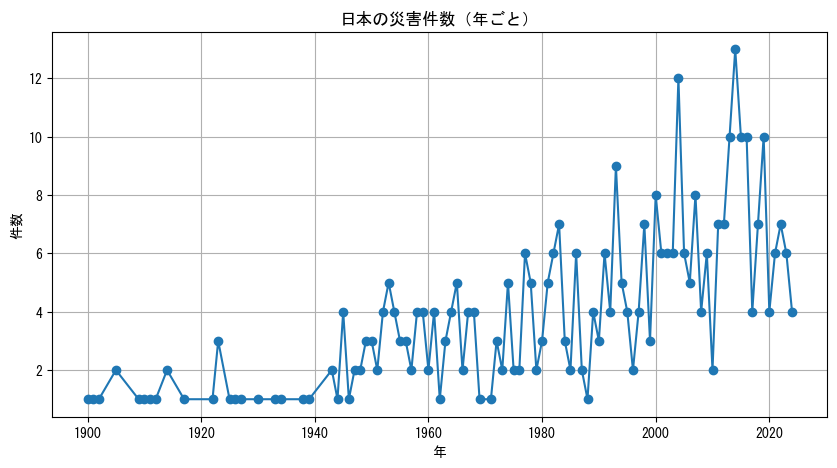

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'   # Windows の日本語フォント
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の □ 化防止


plt.figure(figsize=(10,5))
plt.plot(year_counts['Start Year'], year_counts['件数'], marker='o')
plt.title('日本の災害件数（年ごと）')
plt.xlabel('年')
plt.ylabel('件数')
plt.grid(True)
plt.show()


日本の災害件数は、1900 年代前半では年間 1～2 件程度と比較的少なく推移している。  
しかし、1940 年代以降から件数が徐々に増加し、1970 年代〜2000 年代にかけて顕著な上昇が見られる。  
特に 1990 年代後半から 2010 年代にかけては、年間 6～12 件となる年が多く、過去と比べて明らかに災害報告数が増加している。  

# 年ごとの日本での総死亡者数

In [22]:
year_deaths = japan.groupby('Start Year')['Total Deaths'].sum().reset_index()

year_deaths


,Start Year,Total Deaths
0,1900,30.0
1,1901,18.0
2,1902,125.0
3,1905,52.0
4,1909,41.0
...,...,...
96,2020,84.0
97,2021,62.0
98,2022,112.0
99,2023,15.0


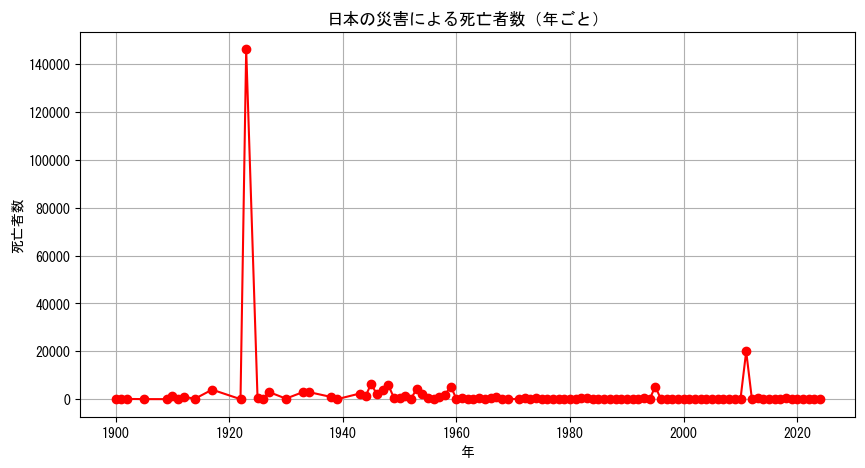

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'   # Windows の日本語フォント
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の □ 化防止


plt.figure(figsize=(10,5))
plt.plot(year_deaths['Start Year'], year_deaths['Total Deaths'], color='red', marker='o')
plt.title('日本の災害による死亡者数（年ごと）')
plt.xlabel('年')
plt.ylabel('死亡者数')
plt.grid(True)
plt.show()


1920年代前半に極端なピークが見られるが、これは 1923年の関東大震災 による犠牲者数を反映している。  
この地震では10万人を超える死者・行方不明者が出ており、日本の災害史の中でも突出している。
グラフでも他の年と比較して明確に異常値として表れており、歴史的な災害の規模をデータからも読み取ることができる。  

その他の山は  
1995年：阪神・淡路大震災（死者約6,400人）  
2011年：東日本大震災（死者・行方不明者約18,000人）   


# 災害タイプごとの件数  

Storm：嵐・暴風災害（台風・サイクロン含む）  
Earthquake：地震  
Flood：洪水  
Mass movement (wet)：土砂災害（特に水を含む：土石流・地滑り）  
Extreme temperature：異常高温・低温（熱波・寒波）  
Volcanic activity：火山活動   
Epidemic：疫病（感染症の流行）   
Drought：干ばつ   
Wildfire：山火事   

In [24]:
type_counts = japan.groupby('Disaster Type').size().reset_index(name='件数').sort_values('件数', ascending=False)

type_counts


,Disaster Type,件数
6,Storm,198
1,Earthquake,72
4,Flood,61
5,Mass movement (wet),23
3,Extreme temperature,17
7,Volcanic activity,15
2,Epidemic,3
0,Drought,1
8,Wildfire,1


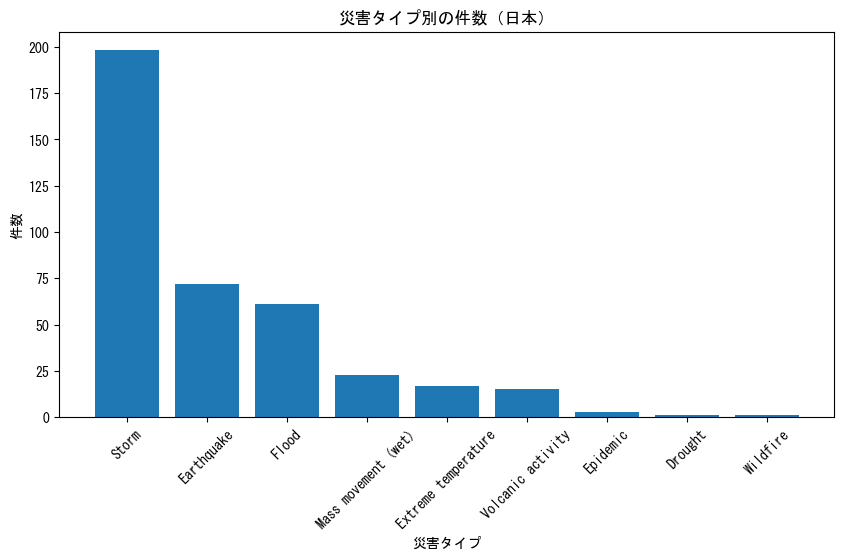

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'   # Windows の日本語フォント
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の □ 化防止


plt.figure(figsize=(10,5))
plt.bar(type_counts['Disaster Type'], type_counts['件数'])
plt.title('災害タイプ別の件数（日本）')
plt.xlabel('災害タイプ')
plt.ylabel('件数')
plt.xticks(rotation=45)
plt.show()


災害タイプ別の件数を見ると、日本では「Storm（暴風・台風）」が圧倒的に多く、200件近くに達している。  
これは日本が台風の主要ルートに位置し、毎年多くの気象災害にさらされていることを示す。  

次いで「Earthquake（地震）」と「Flood（洪水）」が多く、地震大国日本の特徴と、豪雨に伴う洪水リスクの高さが顕著である。  
さらに土砂災害（Mass movement）も比較的多く、山地が多い日本の地形を反映した結果となった。  

一方で、Epidemic（疫病）やDrought（干ばつ）などの災害は非常に少なく、気候や衛生環境が安定している日本の特徴が読み取れる。

# 災害タイプ別の死亡者数

In [26]:
type_deaths = japan.groupby('Disaster Type')['Total Deaths'].sum().reset_index().sort_values('Total Deaths', ascending=False)

type_deaths


,Disaster Type,Total Deaths
1,Earthquake,188415.0
6,Storm,34996.0
4,Flood,13533.0
3,Extreme temperature,1128.0
5,Mass movement (wet),1110.0
7,Volcanic activity,578.0
2,Epidemic,1.0
0,Drought,0.0
8,Wildfire,0.0


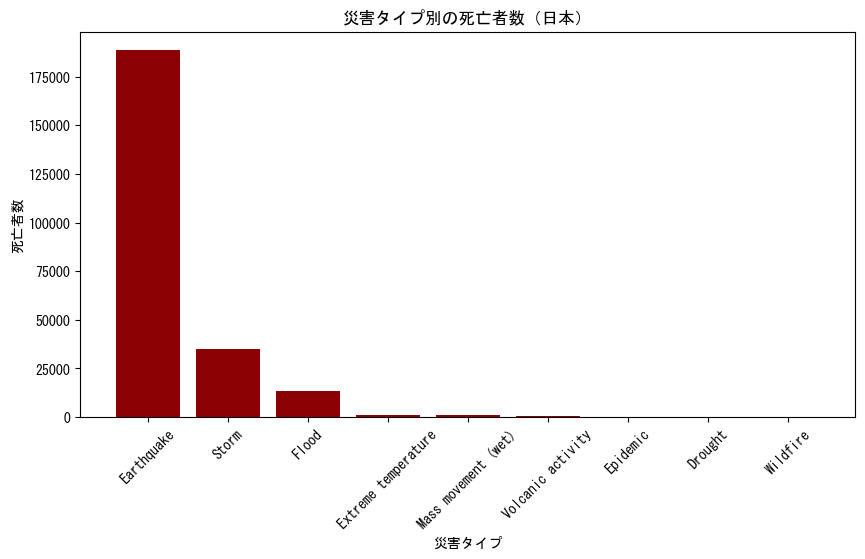

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'   # Windows の日本語フォント
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の □ 化防止

plt.figure(figsize=(10,5))
plt.bar(type_deaths['Disaster Type'], type_deaths['Total Deaths'], color='darkred')
plt.title('災害タイプ別の死亡者数（日本）')
plt.xlabel('災害タイプ')
plt.ylabel('死亡者数')
plt.xticks(rotation=45)
plt.show()


災害タイプ別の死亡者数を比較すると、「Earthquake（地震）」が圧倒的に突出している。  
件数では台風（Storm）が最も多い一方、死亡者数では地震が突出しており、日本における地震災害の破壊力の大きさが分かる。  
また、Storm（暴風・台風）とFlood（洪水）も一定の死亡者数を記録しており、気象災害の危険性も高い。  

特に1923年の関東大震災や、2011年の東日本大震災は死亡者数を大きく押し上げており、1回の大規模地震が統計に強い影響を与えている。  
これにより、日本の災害は「頻度が高い気象災害」と「低頻度だが致命的な地震災害」という二つの特徴を持つことが確認できる。  

# まとめ
災害データを年代別・タイプ別に可視化することで、感覚だけではなく、数字として日本のリスク構造を理解することができた。  
今回の分析は、災害対策やリスク評価を考えるうえでも有用な視点を提供している。　　